<a href="https://colab.research.google.com/github/kristokeith/MachLearn_Ganjil_2023/blob/main/Week%2011/LabAssignment_Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB WORK 2 **BEFORE** MODIFY

### Step 1 - Import Library

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Step 2 - Download CIFAR Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Step 3 - Data Verification

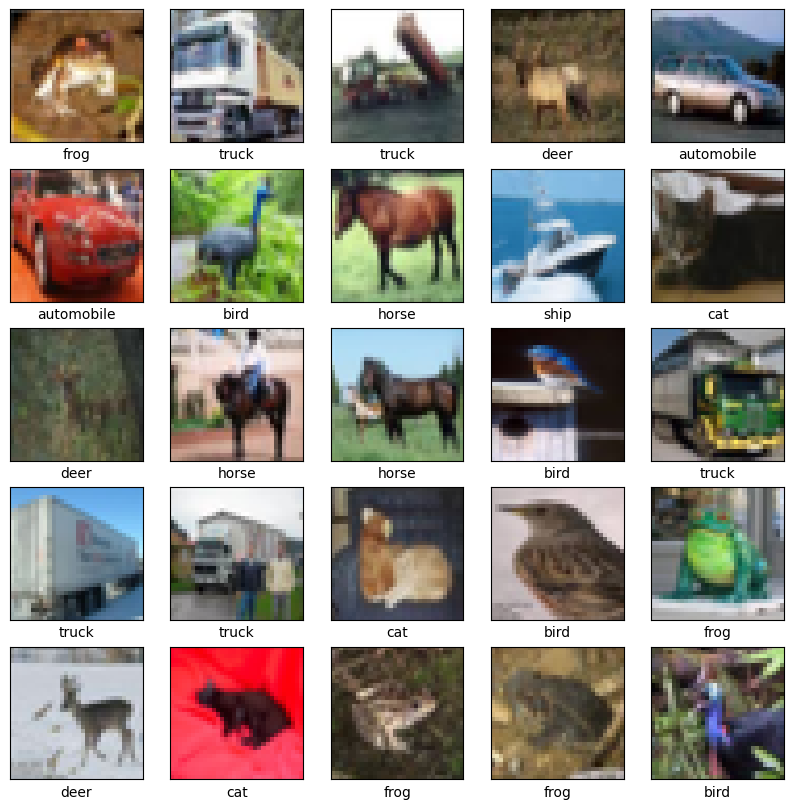

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Step 4 - Build CNN Model
Step 4.1. - Add Convolutional Block

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

Step 4.2. - Check The Architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Step 4.3. - Add Fully Connected Block

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Step 4.4. - Check The Final Architecture

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Step 4.5. - Compile CNN Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Step 5 - Train CNN Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5432 - accuracy: 0.4386 - val_loss: 1.2709 - val_accuracy: 0.5493
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2015 - accuracy: 0.5720 - val_loss: 1.1229 - val_accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0610 - accuracy: 0.6274 - val_loss: 1.1023 - val_accuracy: 0.6132
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9679 - accuracy: 0.6598 - val_loss: 0.9585 - val_accuracy: 0.6658
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8955 - accuracy: 0.6854 - val_loss: 0.9506 - val_accuracy: 0.6680
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8385 - accuracy: 0.7060 - val_loss: 0.9504 - val_accuracy: 0.6766
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7850 - accuracy: 0.7241 - val_loss: 0.9506 -

### Step 6 - Evaluate The Model

313/313 - 2s - loss: 0.8738 - accuracy: 0.7066 - 2s/epoch - 6ms/step


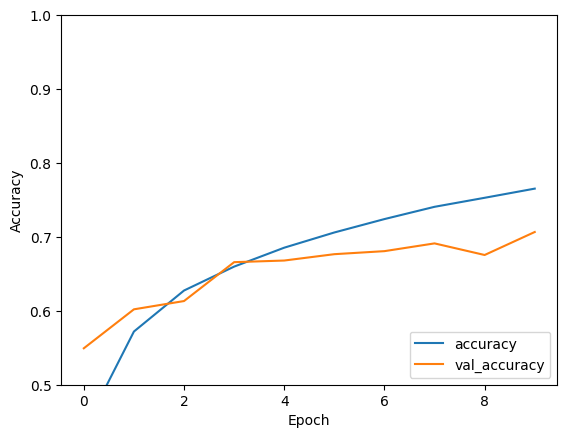

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Step 7 - Print The Accuracy

In [ ]:
print(test_acc)

0.70660001039505


# LAB ASSIGNMENT
- Modify the CNN model in lab work 2 to achieve a testing accuracy of more than 80%.
- Create a CNN model for classifying the MNIST dataset.

# MODIFY CODE
## Test 1
Change activation to 'sigmoid'
Change activation to 'softmax'

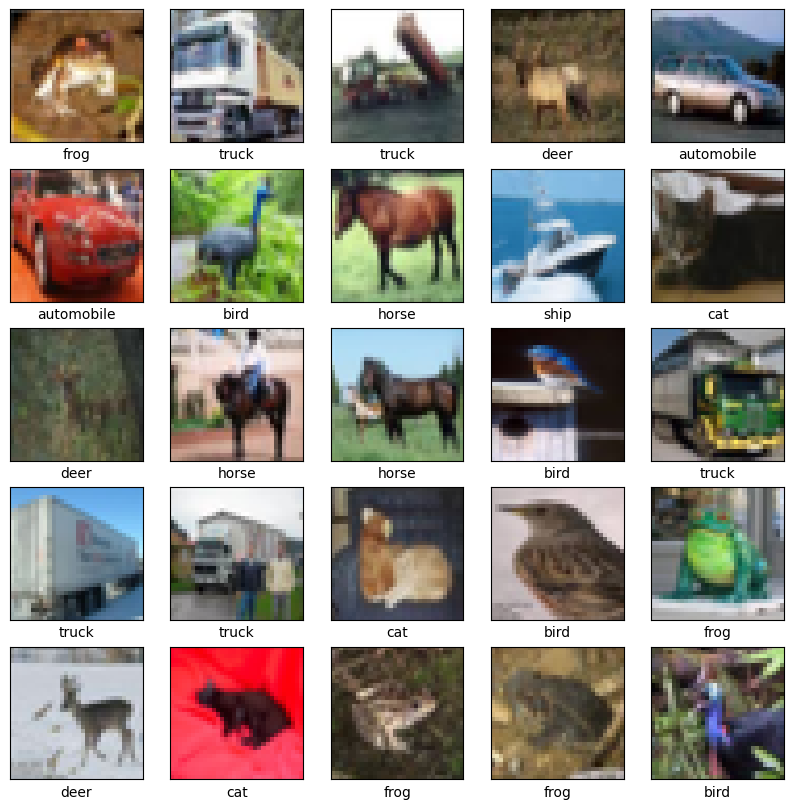

Epoch 1/10
1563/1563 [==============================] - 50s 30ms/step - loss: 1.5473 - accuracy: 0.4346 - val_loss: 1.3671 - val_accuracy: 0.5263
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1639 - accuracy: 0.5853 - val_loss: 1.0809 - val_accuracy: 0.6217
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0103 - accuracy: 0.6445 - val_loss: 1.0153 - val_accuracy: 0.6398
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9044 - accuracy: 0.6822 - val_loss: 0.9400 - val_accuracy: 0.6677
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8259 - accuracy: 0.7125 - val_loss: 0.8909 - val_accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.7523 - accuracy: 0.7369 - val_loss: 0.9051 - val_accuracy: 0.6849
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6943 - accuracy: 0.7573 - val_loss: 0.8635 -

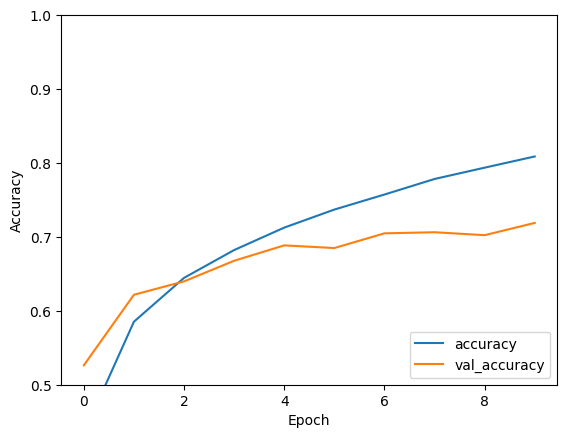

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

## Test 2
Simplify, add softmax activation


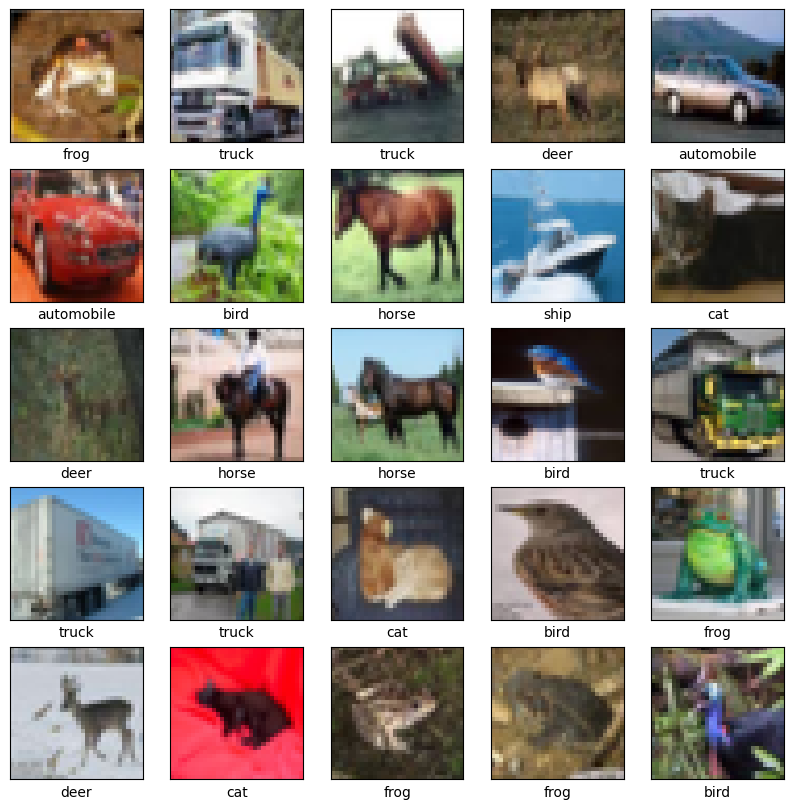

Epoch 1/10
1563/1563 [==============================] - 54s 33ms/step - loss: 1.3837 - accuracy: 0.5065 - val_loss: 1.1002 - val_accuracy: 0.6171
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0288 - accuracy: 0.6409 - val_loss: 1.0652 - val_accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8976 - accuracy: 0.6862 - val_loss: 0.9865 - val_accuracy: 0.6662
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7895 - accuracy: 0.7248 - val_loss: 0.9039 - val_accuracy: 0.6953
Epoch 5/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.6993 - accuracy: 0.7573 - val_loss: 0.8859 - val_accuracy: 0.6998
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6212 - accuracy: 0.7827 - val_loss: 0.8815 - val_accuracy: 0.7118
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.5500 - accuracy: 0.8084 - val_loss: 0.8984 -

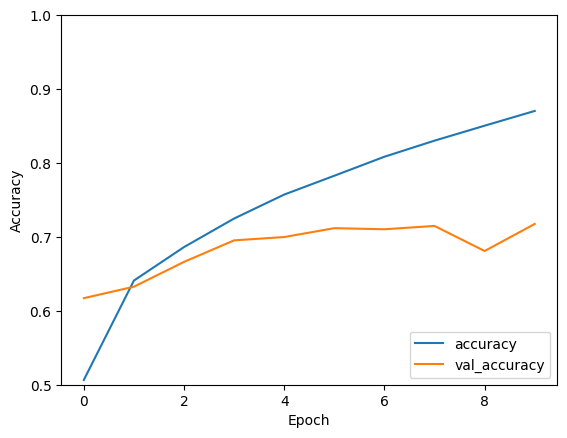

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

## Test 3
Add dropout layer to reduce overfitting

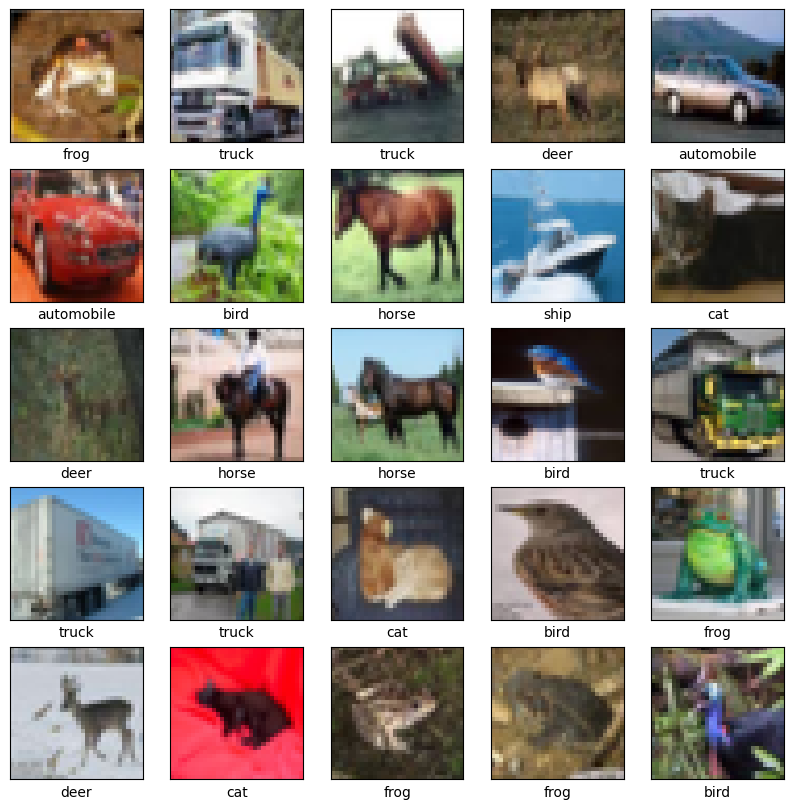

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4803 - accuracy: 0.4648 - val_loss: 1.1987 - val_accuracy: 0.5743
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1491 - accuracy: 0.5961 - val_loss: 1.0297 - val_accuracy: 0.6416
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0223 - accuracy: 0.6424 - val_loss: 0.9558 - val_accuracy: 0.6670
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9331 - accuracy: 0.6732 - val_loss: 0.9826 - val_accuracy: 0.6609
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8692 - accuracy: 0.6951 - val_loss: 0.8893 - val_accuracy: 0.6897
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8107 - accuracy: 0.7167 - val_loss: 0.8591 - val_accuracy: 0.7071
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7635 - accuracy: 0.7326 - val_loss: 0.8767 -

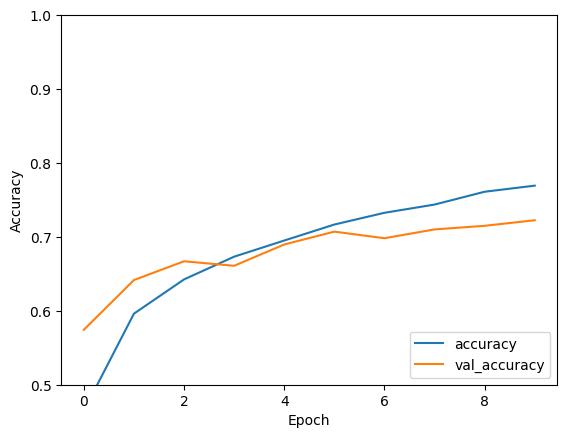

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Test 4
Add padding

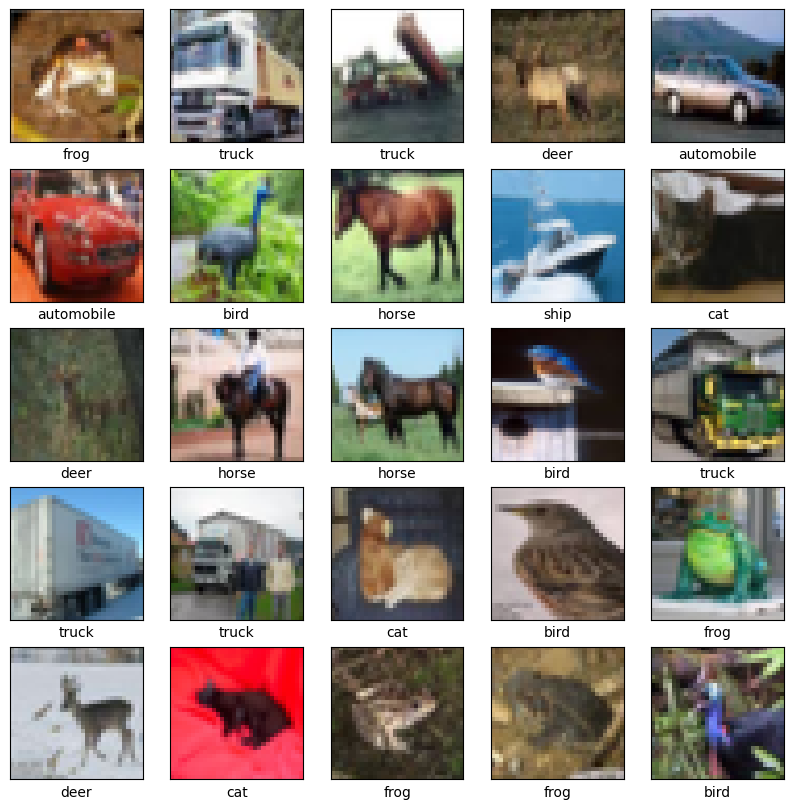

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu', padding='same',input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(64, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(layers.Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/20
1563/1563 [==============================] - 22s 9ms/step - loss: 1.7357 - accuracy: 0.3620 - val_loss: 1.4026 - val_accuracy: 0.4873
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3327 - accuracy: 0.5250 - val_loss: 1.2652 - val_accuracy: 0.5619
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1313 - accuracy: 0.6060 - val_loss: 1.0646 - val_accuracy: 0.6271
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9988 - accuracy: 0.6549 - val_loss: 0.8873 - val_accuracy: 0.6920
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9120 - accuracy: 0.6870 - val_loss: 0.8101 - val_accuracy: 0.7229
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8399 - accuracy: 0.7137 - val_loss: 0.9573 - val_accuracy: 0.6859
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7813 - accuracy: 0.7340 - val_loss: 1.1955 - val_ac

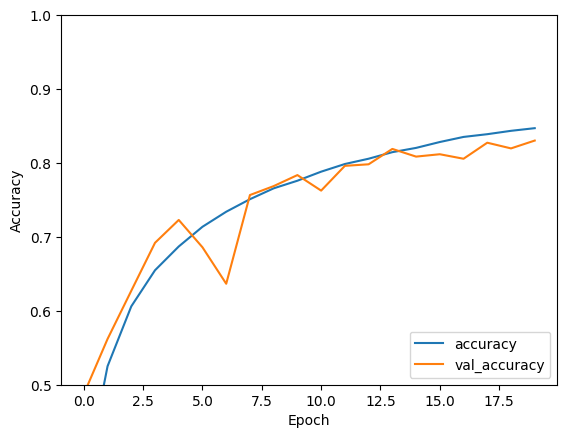

In [2]:
# Allow GPU memory growth
# physical_devices = tf.config.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Train the model
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# MNIST CNN

### Step 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import time

### Step 2 - Load and preprocess the MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Step 3 - Build the CNN model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### Step 4 - Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Step 5 - Train Model

In [ ]:
# Allow GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Measure training time
start_time = time.time()

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Measure testing time
start_time = time.time()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

end_time = time.time()
testing_time = end_time - start_time
print(f'Testing time: {testing_time:.2f} seconds')

print(f'Test accuracy: {test_acc}')

Epoch 1/5
750/750 [==============================] - 30s 38ms/step - loss: 0.2012 - accuracy: 0.9370 - val_loss: 0.0838 - val_accuracy: 0.9753
Epoch 2/5
750/750 [==============================] - 31s 41ms/step - loss: 0.0558 - accuracy: 0.9828 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 3/5
750/750 [==============================] - 30s 40ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0480 - val_accuracy: 0.9865
Epoch 4/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0491 - val_accuracy: 0.9841
Epoch 5/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0240 - accuracy: 0.9921 - val_loss: 0.0406 - val_accuracy: 0.9881
Training time: 143.92 seconds
313/313 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9881
Testing time: 1.34 seconds
Test accuracy: 0.988099992275238


### Step 6 - Show Result

313/313 [==============================] - 1s 4ms/step


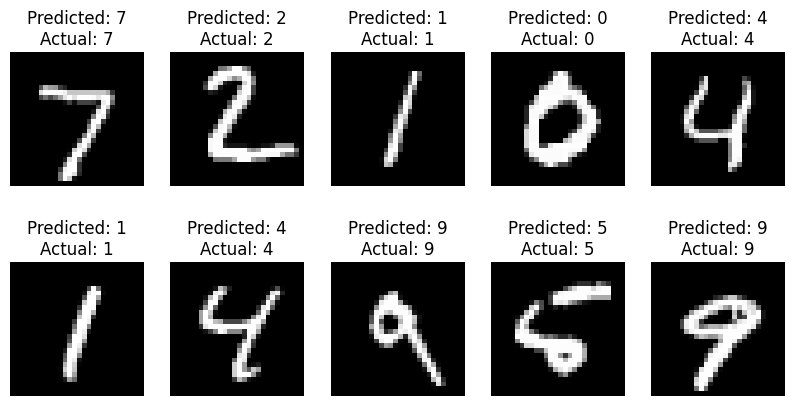

In [ ]:
# Get predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
ground_truth_labels = np.argmax(test_labels, axis=1)

# Display some results
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {ground_truth_labels[i]}')
    plt.axis('off')

plt.show()